In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime
import requests

# Import the API key.
from config import weather_api_key


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


592

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key



In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | rio grande
Processing Record 5 of Set 1 | quelimane
Processing Record 6 of Set 1 | chokurdakh
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | alpena
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | ambatofinandrahana
Processing Record 16 of Set 1 | kapit
Processing Record 17 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 18 of Set 1 | ornskoldsvik
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | ruatoria
City not found. Skipping...
Processing Record 21 of Set 1 | mezen
Processing Record 22

Processing Record 37 of Set 4 | tuatapere
Processing Record 38 of Set 4 | linxia
Processing Record 39 of Set 4 | los llanos de aridane
Processing Record 40 of Set 4 | port hardy
Processing Record 41 of Set 4 | galveston
Processing Record 42 of Set 4 | bambanglipuro
Processing Record 43 of Set 4 | viedma
Processing Record 44 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 45 of Set 4 | ixtapa
Processing Record 46 of Set 4 | torrington
Processing Record 47 of Set 4 | korla
Processing Record 48 of Set 4 | sitka
Processing Record 49 of Set 4 | salta
Processing Record 50 of Set 4 | camacha
Processing Record 1 of Set 5 | vao
Processing Record 2 of Set 5 | alofi
Processing Record 3 of Set 5 | tiarei
Processing Record 4 of Set 5 | inhambane
Processing Record 5 of Set 5 | maykain
City not found. Skipping...
Processing Record 6 of Set 5 | meyungs
City not found. Skipping...
Processing Record 7 of Set 5 | pinheiro machado
Processing Record 8 of Set 5 | ishigaki
Processing Record 

Processing Record 28 of Set 8 | sovetskiy
Processing Record 29 of Set 8 | pevek
Processing Record 30 of Set 8 | pestovo
Processing Record 31 of Set 8 | mitsamiouli
Processing Record 32 of Set 8 | mount gambier
Processing Record 33 of Set 8 | mackay
Processing Record 34 of Set 8 | korem
Processing Record 35 of Set 8 | mitu
Processing Record 36 of Set 8 | cangucu
Processing Record 37 of Set 8 | rongcheng
Processing Record 38 of Set 8 | rocha
Processing Record 39 of Set 8 | torrijos
Processing Record 40 of Set 8 | melissourgoi
City not found. Skipping...
Processing Record 41 of Set 8 | khromtau
Processing Record 42 of Set 8 | joensuu
Processing Record 43 of Set 8 | luoyang
Processing Record 44 of Set 8 | aykhal
Processing Record 45 of Set 8 | abha
Processing Record 46 of Set 8 | prabumulih
Processing Record 47 of Set 8 | manica
Processing Record 48 of Set 8 | merrill
Processing Record 49 of Set 8 | saint-philippe
Processing Record 50 of Set 8 | pingliang
Processing Record 1 of Set 9 | sha

Processing Record 15 of Set 12 | hambantota
Processing Record 16 of Set 12 | shenjiamen
Processing Record 17 of Set 12 | hami
Processing Record 18 of Set 12 | nalut
Processing Record 19 of Set 12 | ankang
Processing Record 20 of Set 12 | mahanje
Processing Record 21 of Set 12 | adrar
Processing Record 22 of Set 12 | leh
Processing Record 23 of Set 12 | shubarshi
Processing Record 24 of Set 12 | usinsk
Processing Record 25 of Set 12 | kushima
Processing Record 26 of Set 12 | namatanai
Processing Record 27 of Set 12 | kudahuvadhoo
Processing Record 28 of Set 12 | alta floresta
Processing Record 29 of Set 12 | itaituba
Processing Record 30 of Set 12 | keti bandar
Processing Record 31 of Set 12 | mercedes
Processing Record 32 of Set 12 | susehri
Processing Record 33 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 34 of Set 12 | eureka
Processing Record 35 of Set 12 | amboasary
Processing Record 36 of Set 12 | padang
Processing Record 37 of Set 12 | megion
Processing Re

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lebu,-37.6167,-73.6500,55.83,92,100,4.03,CL,2022-04-07 02:09:37
1,Ushuaia,-54.8000,-68.3000,38.86,70,40,14.97,AR,2022-04-07 02:09:37
2,Busselton,-33.6500,115.3333,73.40,44,41,9.44,AU,2022-04-07 02:09:37
3,Rio Grande,-32.0350,-52.0986,64.17,83,1,10.85,BR,2022-04-07 02:09:38
4,Quelimane,-17.8786,36.8883,73.44,96,39,3.98,MZ,2022-04-07 02:09:38
5,Chokurdakh,70.6333,147.9167,-1.17,82,2,5.19,RU,2022-04-07 02:09:38
6,Hobart,-42.8794,147.3294,67.01,50,20,5.75,AU,2022-04-07 02:05:52
7,Hermanus,-34.4187,19.2345,51.80,65,93,8.34,ZA,2022-04-07 02:09:39
8,Butaritari,3.0707,172.7902,81.57,76,62,18.81,KI,2022-04-07 02:09:39
9,Alpena,45.0617,-83.4327,34.11,99,75,3.44,US,2022-04-07 02:09:40


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
reordered_city_data_df = city_data_df[new_column_order]
reordered_city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lebu,CL,2022-04-07 02:09:37,-37.6167,-73.6500,55.83,92,100,4.03
1,Ushuaia,AR,2022-04-07 02:09:37,-54.8000,-68.3000,38.86,70,40,14.97
2,Busselton,AU,2022-04-07 02:09:37,-33.6500,115.3333,73.40,44,41,9.44
3,Rio Grande,BR,2022-04-07 02:09:38,-32.0350,-52.0986,64.17,83,1,10.85
4,Quelimane,MZ,2022-04-07 02:09:38,-17.8786,36.8883,73.44,96,39,3.98


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
reordered_city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1649298213.8326435

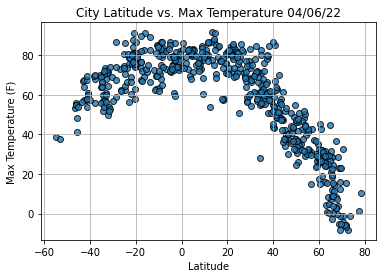

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

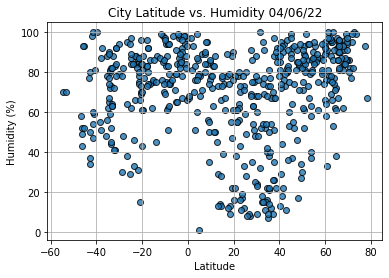

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

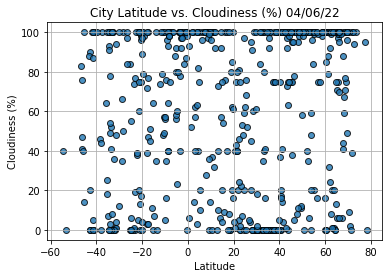

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

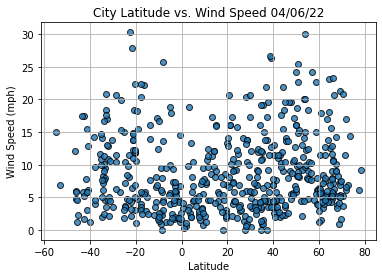

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Import Matplotlib.
import matplotlib.pyplot as plt

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [33]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

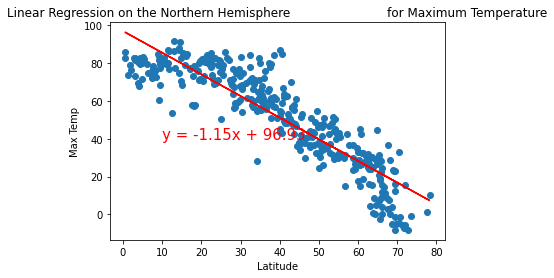

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

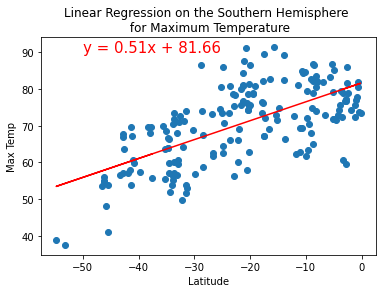

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

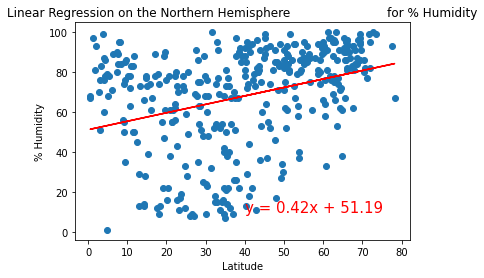

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

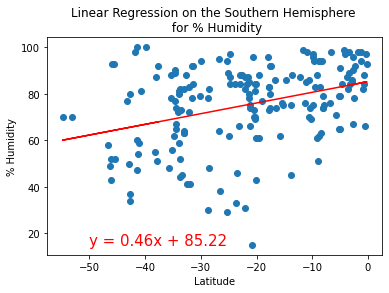

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

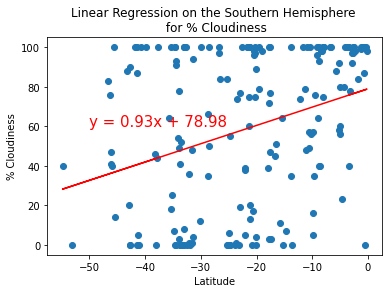

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

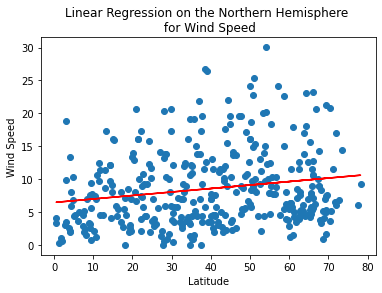

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

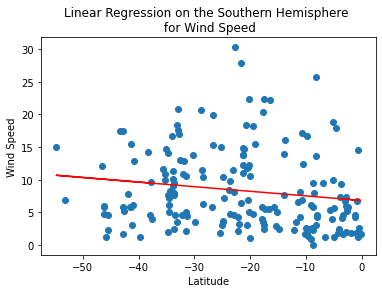

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))